In [155]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pydotplus

#from sklearn import datasets  
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import tree

In [156]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn import externals
from io import StringIO
from sklearn.tree import DecisionTreeClassifier as DT
from sklearn.metrics import accuracy_score
import matplotlib.image as mpimg 
from sklearn.tree import export_graphviz

import the data

In [157]:
df = pd.read_csv('/content/Fraud_check.csv')

In [158]:
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [159]:
data = df.copy()

In [160]:
data.head()

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


In [161]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital.Status   600 non-null    object
 2   Taxable.Income   600 non-null    int64 
 3   City.Population  600 non-null    int64 
 4   Work.Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


In [162]:
data.describe()

,Taxable.Income,City.Population,Work.Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [163]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Taxable.Income,600.0,55208.375000,26204.827597,10003.0,32871.50,55074.5,78611.75,99619.0
City.Population,600.0,108747.368333,49850.075134,25779.0,66966.75,106493.5,150114.25,199778.0
Work.Experience,600.0,15.558333,8.842147,0.0,8.00,15.0,24.00,30.0


In [164]:
data['Marital.Status'].value_counts()

Single      217
Married     194
Divorced    189
Name: Marital.Status, dtype: int64

In [165]:
data.shape

(600, 6)

In [166]:
data.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


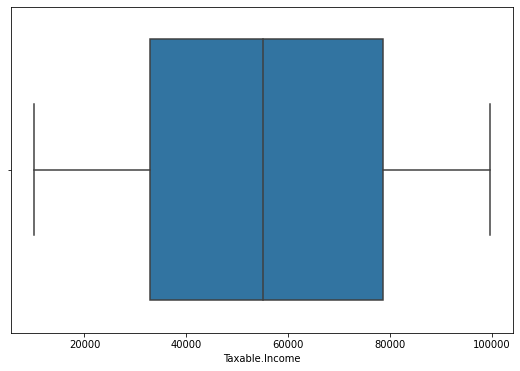

In [167]:
# Check for outliers
ax = sns.boxplot(data['Taxable.Income'])

In [168]:
plt.rcParams["figure.figsize"] = 9,6

Skew: 0.030014788906377175
Kurtosis: -1.1997824607083138


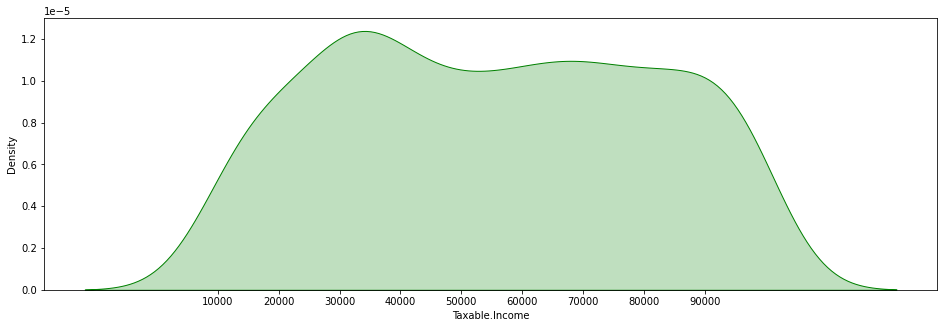

In [169]:
plt.figure(figsize=(16,5))
print("Skew: {}".format(data['Taxable.Income'].skew()))
print("Kurtosis: {}".format(data['Taxable.Income'].kurtosis()))
ax = sns.kdeplot(data['Taxable.Income'],shade=True, color='g')
plt.xticks([i for i in range(10000,100000,10000)])
plt.show()

Skewness value =  0.030014788906377175 The data is Skwed on the right.   
Kurtosis = -1.1997824607083138 The data has negative Kurtosis.

In [170]:
obj_colum = data.select_dtypes(include='object').columns.tolist()

In [171]:
num_columns = data.select_dtypes(exclude='object').columns.tolist()

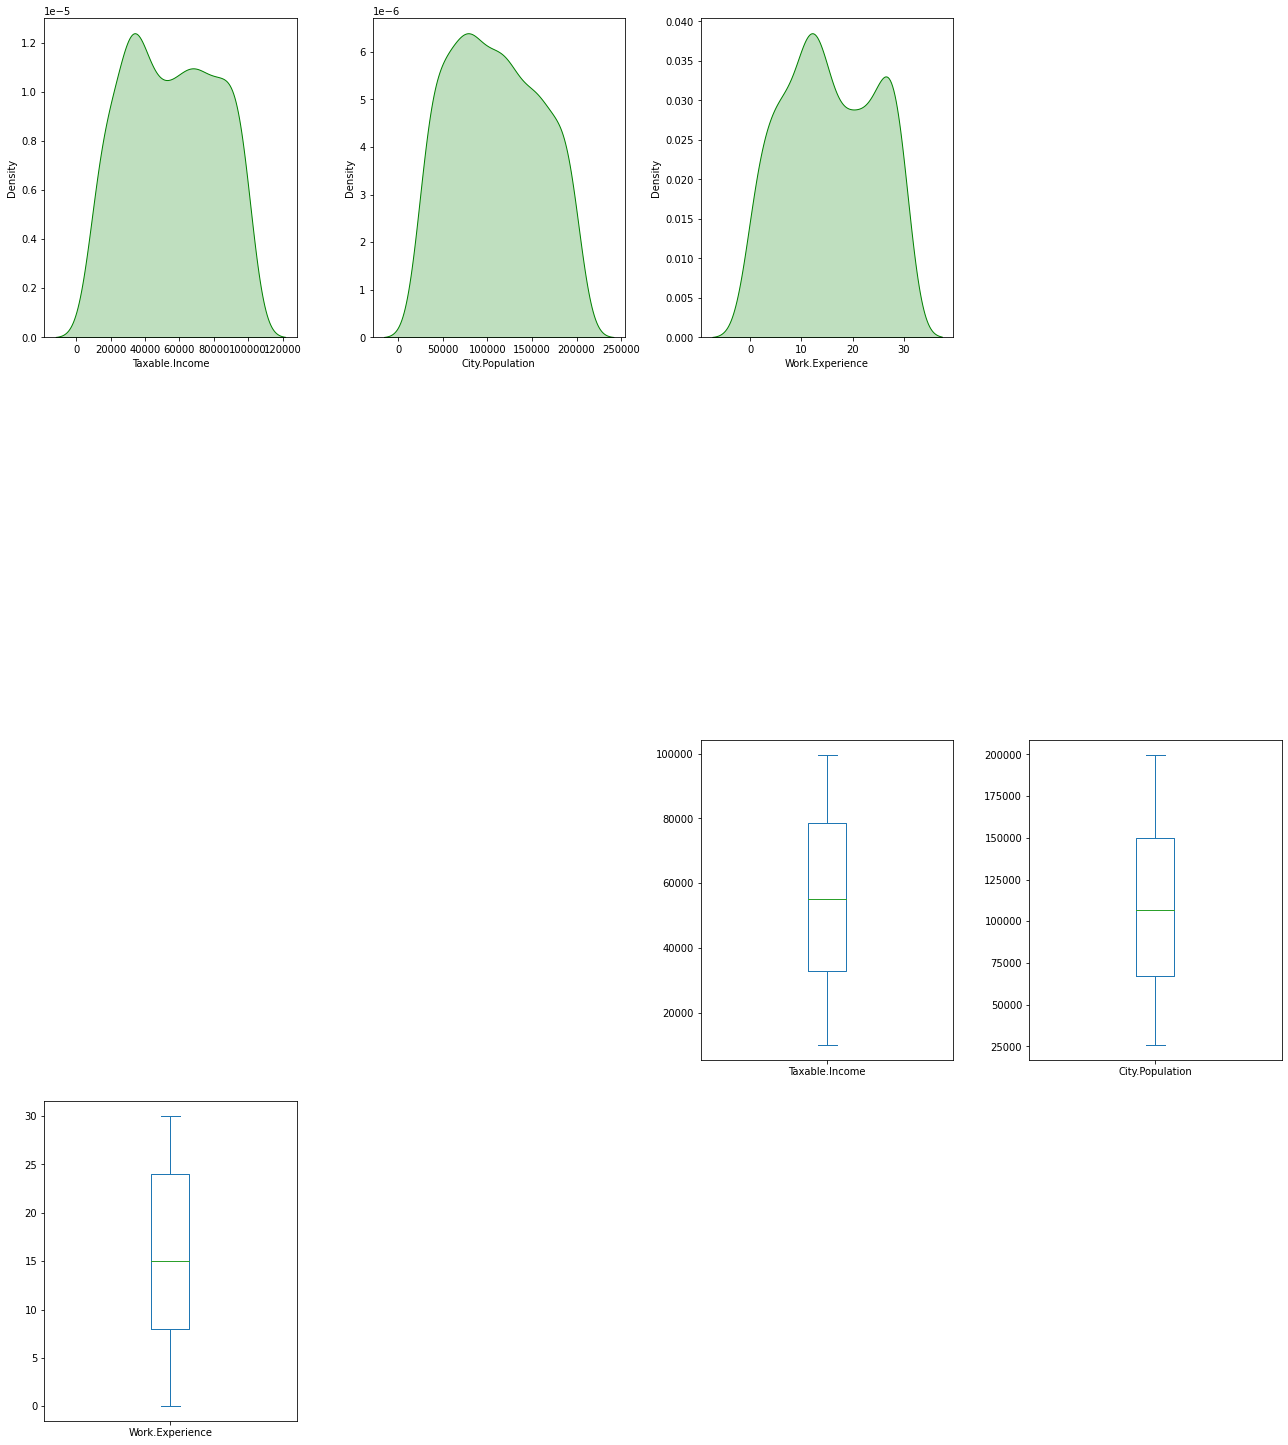

,Taxable.Income,City.Population,Work.Experience
skewness,0.030015,0.125009,0.018529
kurtosis,-1.199782,-1.120154,-1.167524


In [172]:
plt.figure(figsize=(18,40))
for i,col in enumerate(num_columns,1):
    plt.subplot(8,4,i)
    sns.kdeplot(data[col],color='g',shade=True)
    plt.subplot(8,4,i+10)
    data[col].plot.box()
plt.tight_layout() 
plt.show()
num_data = data[num_columns]
pd.DataFrame(data=[num_data.skew(),num_data.kurtosis()],index=['skewness','kurtosis'])

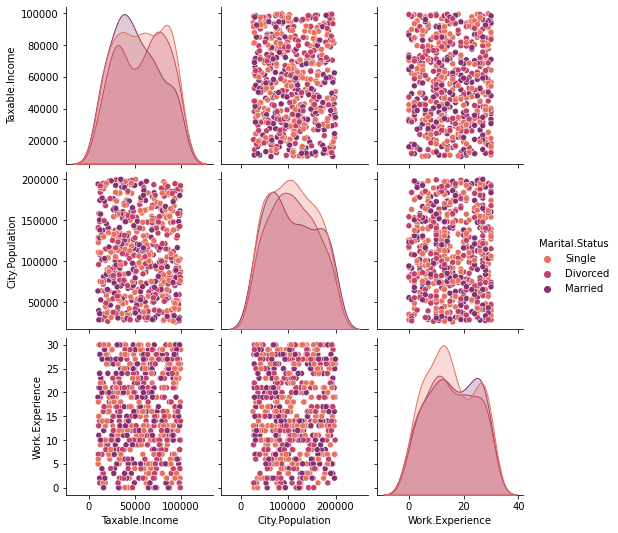

In [173]:
sns.pairplot(data, hue = 'Marital.Status', palette='flare')

In [174]:
data = pd.get_dummies(data, columns = ['Undergrad','Marital.Status','Urban'])

In [175]:
corr = data.corr()

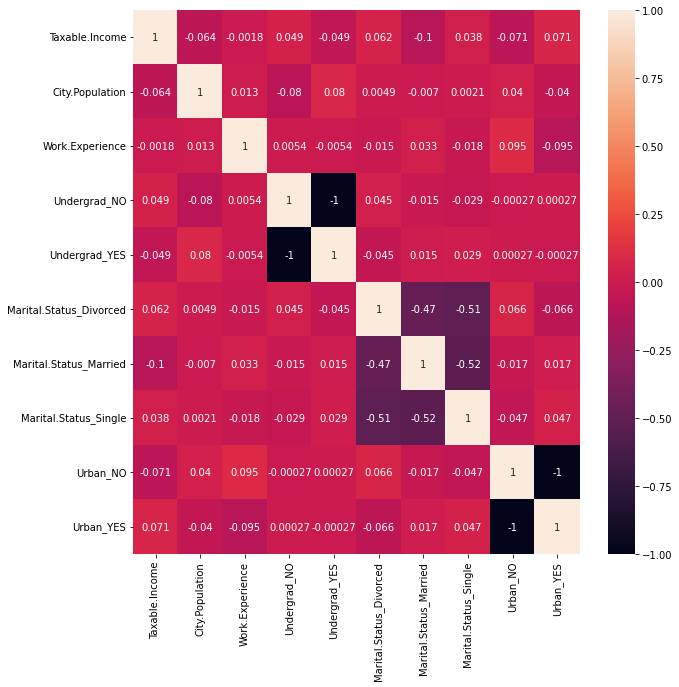

In [176]:
plt.figure(figsize=(10,10))
sns.heatmap(corr, annot=True,)

Since the target variable is continious, we create a class of taxable_income <= 30000 as "Risky" and others are "Good"

# Building Decision Tree Classifier using Entropy Criteria

In [177]:
data['Taxable.Income']=pd.cut(data['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [178]:
x=data.iloc[:,1:10]
y=data.iloc[:,0]

In [179]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2)

In [180]:
y_train.value_counts()

good     393
risky     87
Name: Taxable.Income, dtype: int64

In [181]:
# Splitting data into training and testing data set

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [210]:
model = DecisionTreeClassifier(criterion = 'entropy')
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [211]:
list(data.columns)

['Taxable.Income',
 'City.Population',
 'Work.Experience',
 'Undergrad_NO',
 'Undergrad_YES',
 'Marital.Status_Divorced',
 'Marital.Status_Married',
 'Marital.Status_Single',
 'Urban_NO',
 'Urban_YES']

In [212]:
y_train.value_counts()

good     382
risky     98
Name: Taxable.Income, dtype: int64

In [213]:
model = DT(criterion='entropy') 
model.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [214]:
# data['Taxable.Income']=pd.cut(data['Taxable.Income'],bins=[0,30000,100000],labels=['risky','good'])

In [215]:
pred_train = model.predict(x_train)

In [216]:
accuracy_score(y_train,pred_train)

1.0

In [217]:
confusion_matrix(y_train,pred_train)

array([[382,   0],
       [  0,  98]])

In [218]:
pred_test = model.predict(x_test)

In [219]:
accuracy_score(y_test,pred_test)

0.6416666666666667

In [220]:
confusion_matrix(y_test,pred_test)

array([[71, 23],
       [20,  6]])

[Text(0.548807123655914, 0.98, 'X[5] <= 0.5\nentropy = 0.73\nsamples = 480\nvalue = [382, 98]'),
 Text(0.4151545698924731, 0.94, 'X[1] <= 29.5\nentropy = 0.685\nsamples = 324\nvalue = [265, 59]'),
 Text(0.33568548387096775, 0.9, 'X[1] <= 23.5\nentropy = 0.666\nsamples = 311\nvalue = [257, 54]'),
 Text(0.23588709677419356, 0.86, 'X[1] <= 0.5\nentropy = 0.715\nsamples = 244\nvalue = [196, 48]'),
 Text(0.22513440860215053, 0.82, 'entropy = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.24663978494623656, 0.82, 'X[0] <= 109749.5\nentropy = 0.727\nsamples = 237\nvalue = [189, 48]'),
 Text(0.1424731182795699, 0.78, 'X[0] <= 82976.5\nentropy = 0.647\nsamples = 121\nvalue = [101, 20]'),
 Text(0.10215053763440861, 0.74, 'X[0] <= 80463.0\nentropy = 0.756\nsamples = 78\nvalue = [61, 17]'),
 Text(0.0913978494623656, 0.7, 'X[1] <= 12.5\nentropy = 0.717\nsamples = 76\nvalue = [61, 15]'),
 Text(0.053763440860215055, 0.66, 'X[3] <= 0.5\nentropy = 0.469\nsamples = 40\nvalue = [36, 4]'),
 Text(0.0430107526

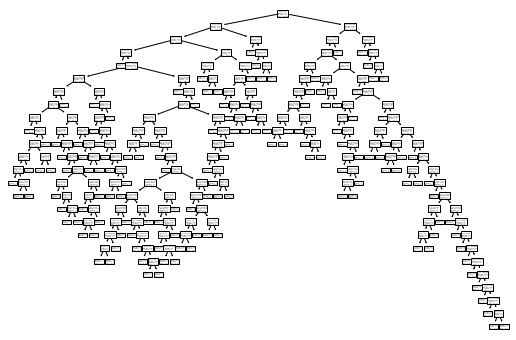

In [221]:
#PLot the decision tree
plot_tree(model)

In [222]:
df_t=pd.DataFrame({'Actual':y_test, 'Predicted':pred_test})

In [223]:
df_t

,Actual,Predicted
110,risky,risky
419,good,risky
565,good,risky
77,good,good
181,risky,risky
...,...,...
399,good,good
340,good,good
148,good,good
494,good,good


In [224]:
cols = list(data.columns)

In [225]:
predictors = cols[1:10]
target = cols[0]

In [226]:
dot_data = StringIO()

In [227]:
export_graphviz(model, out_file = dot_data ,filled = True,rounded =True,feature_names = predictors,class_names = target, impurity = False)

In [228]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

In [229]:
graph.write_png('fraud_data.png')

True

# 4 - Conclusion
Since the accuracy of the Training set is 100% we test the accurancy on the test data which is 64.17% by **Entropy Criterion**.

In [230]:
img = mpimg.imread('fraud_data.png') 

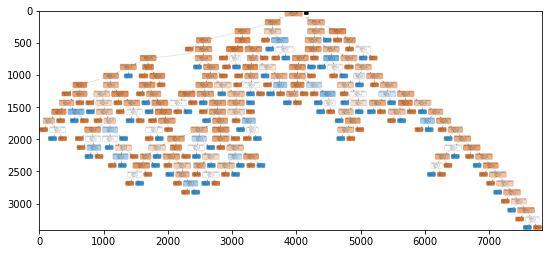

In [231]:
plt.imshow(img)

In [232]:
# feature importance 
model.feature_importances_

array([0.56914169, 0.22691912, 0.0395517 , 0.03797109, 0.01141266,
       0.00600056, 0.01360827, 0.04955732, 0.0458376 ])

In [233]:
fi = pd.DataFrame({'feature': list(x_train.columns),
                   'importance': model.feature_importances_}).\
                    sort_values('importance', ascending = False)

In [234]:
fi

,feature,importance
0,City.Population,0.569142
1,Work.Experience,0.226919
7,Urban_NO,0.049557
8,Urban_YES,0.045838
2,Undergrad_NO,0.039552
3,Undergrad_YES,0.037971
6,Marital.Status_Single,0.013608
4,Marital.Status_Divorced,0.011413
5,Marital.Status_Married,0.006001


From above, we can say that the city population is the most important feature in the data.